# MongoDB Tutorial

## Step 1: Dataset
### A rich dataset of Fraudulent Transactions:
https://www.kaggle.com/chitwanmanchanda/fraudulent-transactions-data

## Step 2: Import Data into Mongo

In [1]:
import pymongo
import pprint
import json
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# connect to the mongoclient
client = pymongo.MongoClient('mongodb://localhost:27017')

# get the database
database = client['Fraud']

In [3]:
# create weekly demand collection
database.create_collection("FraudData")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Fraud'), 'FraudData')

In [4]:
fraud_collection = database.get_collection("FraudData")

In [ ]:
# Open the Fraud CSV and Convert to JSON

import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'/Users/jtfallon/Downloads/Fraud.csv'
jsonFilePath = r'/Users/jtfallon/Downloads/fraud_data.json'
csv_to_json(csvFilePath, jsonFilePath)



# AFTER THIS PART EVERYTHING IS FOR HW # 3 --- still need to finish changing

## Step 3: Mongo DB Tutorial

#### Q1. How many Walmarts are in the data set?
This query counts the number of documents in the walmart collection,
effectively returning the number of Walmarts in it.

In [7]:
walmart_collection.count_documents({})

5821

#### Q2. How many Walmarts are there in Massachusetts? Boston?

In [8]:
result_1 = walmart_collection.find({
    "state" : { "$eq" : "MA"}
})

ma_walmarts = []
for i in result_1:
    ma_walmarts.append(i)
    
len(ma_walmarts)

63

#### Answer: There are 63 Walmarts in Massachusetts.

In [9]:
result_2 = walmart_collection.find({
    "city" : { "$eq" : "Boston"}
})

bos_walmarts = []
for i in result_2:
    bos_walmarts.append(i)

len(bos_walmarts)

2

#### Answer: There are 2 Walmarts in Boston

#### Q3. Which city has the most Walmarts?

In [10]:
result_3 = walmart_collection.aggregate([ { 
    "$group" : { 
        "_id" : "$city", 
        "amt": { "$sum": 1 }
    } 
} ] )

city_sums = []
for i in result_3:
    city_sums.append(i)
    


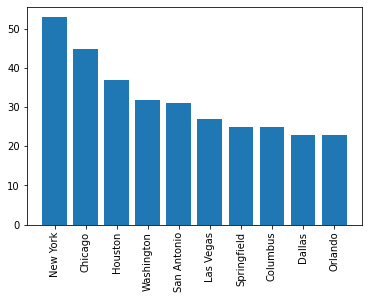

In [11]:
df = pd.DataFrame(city_sums)
top_cities = df.sort_values(by=['amt'], ascending=False).head(10)
x = top_cities['_id']
y = top_cities['amt']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()

#### Answer: New York City has the most Walmart stores

#### Q4. Which state has the most walmarts?

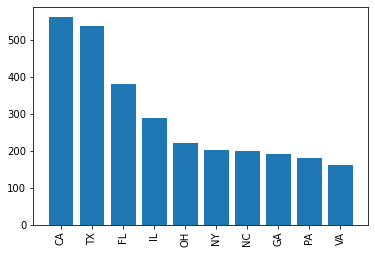

In [12]:
result_4 = walmart_collection.aggregate([ { 
    "$group" : { 
        "_id" : "$state", 
        "amt": { "$sum": 1 }
    } 
} ] )

state_sums = []
for i in result_4:
    state_sums.append(i)
    
    
df = pd.DataFrame(state_sums)
top_states = df.sort_values(by=['amt'], ascending=False).head(10)
x = top_states['_id']
y = top_states['amt']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()

#### Answer: California and Texas have the most Walmart stores.

#### Q.5 How many Walmarts are on the East Coast?

In [13]:
result_5 = walmart_collection.find({ "timeZone" : "EST"})

zone_sum = []
for i in result_5:
    zone_sum.append(i)
    
len(zone_sum)

2294

#### Answer: There are 2294 Walmart locations in the EST timezone

#### Q.6 What is the most common form of Walmart location?

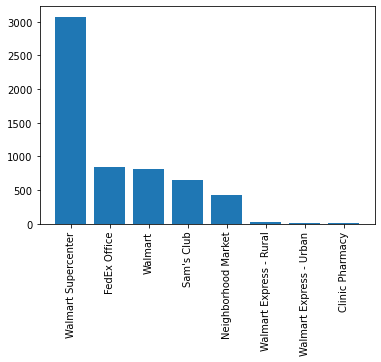

In [14]:
result_6 = walmart_collection.aggregate([ { 
    "$group" : { 
        "_id" : "$name", 
        "amt": { "$sum": 1 }
    } 
} ] )

name_sums = []
for i in result_6:
    name_sums.append(i)
    
    
df = pd.DataFrame(name_sums)
top_names = df.sort_values(by=['amt'], ascending=False).head(10)
x = top_names['_id']
y = top_names['amt']

plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()

#### Anwer: The most common form of Walmart location is "Walmart Supercenter", with just over 3000 locations

#### Q7. What is the distribution of the different type of Walmart locations in MA?

In [15]:
result_7 = walmart_collection.aggregate([ 
    ## stage 1
    {
        "$match" : { "state" :
                    { "$eq" : "MA" }
                   }
    },
    
    {
        "$group" : { 
        "_id" : "$name", 
        "amt": { "$sum": 1 }
    } 
} ] )

In [16]:
for i in result_7:
    print(i)

{'_id': 'Walmart Supercenter', 'amt': 13}
{'_id': 'FedEx Office', 'amt': 12}
{'_id': 'Walmart', 'amt': 35}
{'_id': "Sam's Club", 'amt': 3}


#### Answer:
{'_id': 'Walmart Supercenter', 'amt': 13}
{'_id': 'FedEx Office', 'amt': 12}
{'_id': 'Walmart', 'amt': 35}
{'_id': "Sam's Club", 'amt': 3}

#### Q.8 How many Fedex Office Locations are in NYC?

In [17]:
result_8 = walmart_collection.aggregate([ 
    {
        "$match" : { "city" :
                    { "$eq" : "New York" }
                   }
    },
    
    {
          "$match" : { "name" :
                    { "$eq" : "FedEx Office" }
    } 
} ] )

num_fedex = []
for i in result_8:
    num_fedex.append(i)
    
len(num_fedex)

53

####  Answer: There are 53 Fedex Office locations in NYC

#### Q.9 Rank U.S. states in order of fewest Walmarts to Most Walmart locations

In [18]:
result_9 = walmart_collection.aggregate([ 
    {
        "$group" : { 
        "_id" : "$state", 
        "amt": { "$sum": 1 }
    }},
        {
        "$sort" : { "amt" : 1
                   }
} ] )

for i in result_9:
    print(i)

{'_id': 'VT', 'amt': 5}
{'_id': 'RI', 'amt': 10}
{'_id': 'WY', 'amt': 12}
{'_id': 'HI', 'amt': 13}
{'_id': 'AK', 'amt': 13}
{'_id': 'DE', 'amt': 14}
{'_id': 'MT', 'amt': 15}
{'_id': 'SD', 'amt': 16}
{'_id': 'ND', 'amt': 17}
{'_id': 'DC', 'amt': 24}
{'_id': 'ID', 'amt': 25}
{'_id': 'ME', 'amt': 25}
{'_id': 'NH', 'amt': 34}
{'_id': 'WV', 'amt': 44}
{'_id': 'NE', 'amt': 46}
{'_id': 'NM', 'amt': 48}
{'_id': 'NV', 'amt': 50}
{'_id': 'UT', 'amt': 57}
{'_id': 'CT', 'amt': 57}
{'_id': 'MA', 'amt': 63}
{'_id': 'OR', 'amt': 66}
{'_id': 'IA', 'amt': 67}
{'_id': 'MS', 'amt': 74}
{'_id': 'MD', 'amt': 76}
{'_id': 'KS', 'amt': 86}
{'_id': 'NJ', 'amt': 94}
{'_id': 'SC', 'amt': 97}
{'_id': 'KY', 'amt': 104}
{'_id': 'WA', 'amt': 107}
{'_id': 'MN', 'amt': 110}
{'_id': 'LA', 'amt': 114}
{'_id': 'OK', 'amt': 119}
{'_id': 'WI', 'amt': 120}
{'_id': 'AZ', 'amt': 124}
{'_id': 'AL', 'amt': 127}
{'_id': 'IN', 'amt': 127}
{'_id': 'AR', 'amt': 130}
{'_id': 'CO', 'amt': 133}
{'_id': 'TN', 'amt': 136}
{'_id': 'MO', 

#### Q.10 Rank Cities in Massachusetts in order of fewest Walmarts to Most Walmart locations

In [19]:
result_10 = walmart_collection.aggregate([ 
    {
        "$match" : { "state" :
                    { "$eq" : "MA" }
                   } 
    },
    {
        "$group" : { 
            "_id" : "$city", 
            "amt": { "$sum": 1 }
        }},
    {
        "$sort" : { "amt" : 1
                  }
    }
] )

for i in result_10:
    print(i)

{'_id': 'Chestnut Hill', 'amt': 1}
{'_id': 'Hyannis', 'amt': 1}
{'_id': 'North Dartmouth', 'amt': 1}
{'_id': 'Leominster', 'amt': 1}
{'_id': 'Framingham', 'amt': 1}
{'_id': 'Orange', 'amt': 1}
{'_id': 'Gardner', 'amt': 1}
{'_id': 'Walpole', 'amt': 1}
{'_id': 'Quincy', 'amt': 1}
{'_id': 'Saugus', 'amt': 1}
{'_id': 'Teaticket', 'amt': 1}
{'_id': 'Chicopee', 'amt': 1}
{'_id': 'Tewksbury', 'amt': 1}
{'_id': 'Bellingham', 'amt': 1}
{'_id': 'Lunenburg', 'amt': 1}
{'_id': 'Danvers', 'amt': 1}
{'_id': 'Westfield', 'amt': 1}
{'_id': 'East Wareham', 'amt': 1}
{'_id': 'Hadley', 'amt': 1}
{'_id': 'Northborough', 'amt': 1}
{'_id': 'Swansea', 'amt': 1}
{'_id': 'Haverhill', 'amt': 1}
{'_id': 'Chelmsford', 'amt': 1}
{'_id': 'Springfield', 'amt': 1}
{'_id': 'Braintree', 'amt': 1}
{'_id': 'North Reading', 'amt': 1}
{'_id': 'Weymouth', 'amt': 1}
{'_id': 'Leicester', 'amt': 1}
{'_id': 'Hudson', 'amt': 1}
{'_id': 'North Attleboro', 'amt': 1}
{'_id': 'Brockton', 'amt': 1}
{'_id': 'Salem', 'amt': 1}
{'_id': 